## Importing packages

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import wrangle
import json

## Acquiring the data

In [2]:
df = pd.read_csv('311_service_calls.csv')

## Preparing the data

In [3]:
df = wrangle.clean_311(df)

In [33]:
df['zipcode'] = df['address'].str.extract(r'.*(\d{5}(\-\d{4})?)$')

In [18]:
df.head()

case_id  open_date   due_date closed_date is_late  \
0  1010444245 2012-08-15 2012-08-30         NaT     YES   
1  1010888252 2013-06-06 2013-08-09         NaT     YES   
2  1010966128 2013-07-19 2013-09-23         NaT     YES   
3  1011052825 2013-09-16 2013-09-30         NaT     YES   
4  1011052826 2013-09-16 2013-09-30         NaT     YES   

                        dept call_reason                          case_type  \
0  Code Enforcement Services     cleanup           Graffiti Public Property   
1  Code Enforcement Services        code              Alley-Way Maintenance   
2  Code Enforcement Services        code   Junk Vehicle On Private Property   
3  Code Enforcement Services        code  Right Of Way/Sidewalk Obstruction   
4  Code Enforcement Services        code  Right Of Way/Sidewalk Obstruction   

  case_status                   source_id  \
0        Open                  Web Portal   
1        Open                  Web Portal   
2        Open                  Web Portal   
3        Open  Internal Services Requests   
4        Open  Internal Services Requests   

                                  address  council_district  longitude  \
0   600  NOGALITOS ST, San Antonio, 78204                 5  2125683.0   
1  6043  CASTLE QUEEN, San Antonio, 78218                 2  2169702.0   
2        842  KIRK PL, San Antonio, 78226                 5  2116192.0   
3   54  KENROCK RIDGE, San Antonio, 78254                 7  2082242.0   
4   74  KENROCK RIDGE, San Antonio, 78254                 7  2082389.0   

     latitude  days_open  resolution_days_due  days_before_or_after_due  \
0  13695548.0        NaN                   15                       NaN   
1  13725769.0        NaN                   64                       NaN   
2  13692260.0        NaN                   66                       NaN   
3  13737817.0        NaN                   14                       NaN   
4  13737877.0        NaN                   14                       NaN   

  level_of_delay zipcode  
0     Still Open   78204  
1     Still Open   78218  
2     Still Open   78226  
3     Still Open   78254  
4     Still Open   78254

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481205 entries, 0 to 495439
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   case_id                   481205 non-null  int64         
 1   open_date                 481205 non-null  datetime64[ns]
 2   due_date                  481205 non-null  datetime64[ns]
 3   closed_date               431696 non-null  datetime64[ns]
 4   is_late                   481205 non-null  object        
 5   dept                      481205 non-null  object        
 6   call_reason               481205 non-null  object        
 7   case_type                 481205 non-null  object        
 8   case_status               481205 non-null  object        
 9   source_id                 481205 non-null  object        
 10  address                   481205 non-null  object        
 11  council_district          481205 non-null  int64         
 12  lo

In [5]:
# This dataset is very thorough with nulls only around 10% for the dept column (nulls in CLOSEDDATETIME is just 
# indicative of an open case)

df.isna().sum()

case_id                         0
open_date                       0
due_date                        0
closed_date                 49509
is_late                         0
dept                            0
call_reason                     0
case_type                       0
case_status                     0
source_id                       0
address                         0
council_district                0
longitude                       0
latitude                        0
days_open                   49509
resolution_days_due             0
days_before_or_after_due    49509
level_of_delay                  0
zipcode                     76066
dtype: int64

In [7]:
# Roughly 1/5 of our cases came back late

df.groupby('is_late').case_id.count()

is_late
NO     386598
YES     94607
Name: case_id, dtype: int64

In [12]:
# Note that the CLOSEDDATETIME column has 54053 nulls which matches, probably safe to assume these cases are indeed
# still open

df.groupby('case_status').case_id.count()

case_status
Closed    431696
Open       49509
Name: case_id, dtype: int64

In [13]:
df.groupby('council_district').case_id.count()

council_district
0      2585
1     64200
2     63722
3     60951
4     45719
5     65734
6     41538
7     45083
8     26516
9     26239
10    38918
Name: case_id, dtype: int64

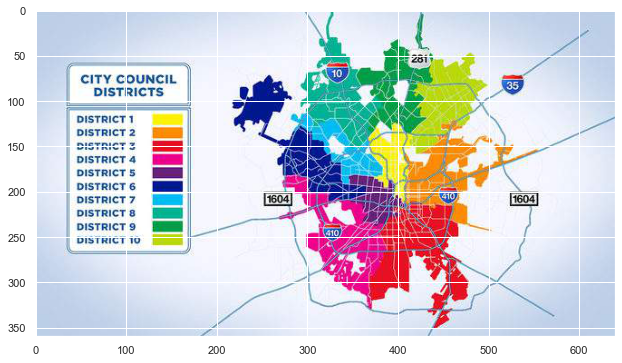

In [14]:
plt.subplots(figsize=(16, 6))
img = mpimg.imread('council_map.jpg')
imgplot = plt.imshow(img)
plt.show()

<AxesSubplot:xlabel='dept', ylabel='count'>

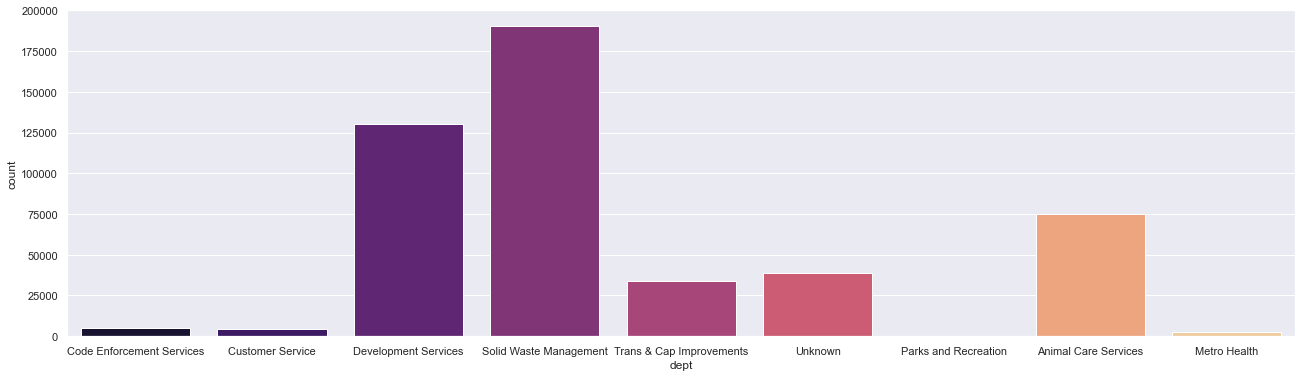

In [15]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x = 'dept', palette = "magma")

<AxesSubplot:xlabel='call_reason', ylabel='count'>

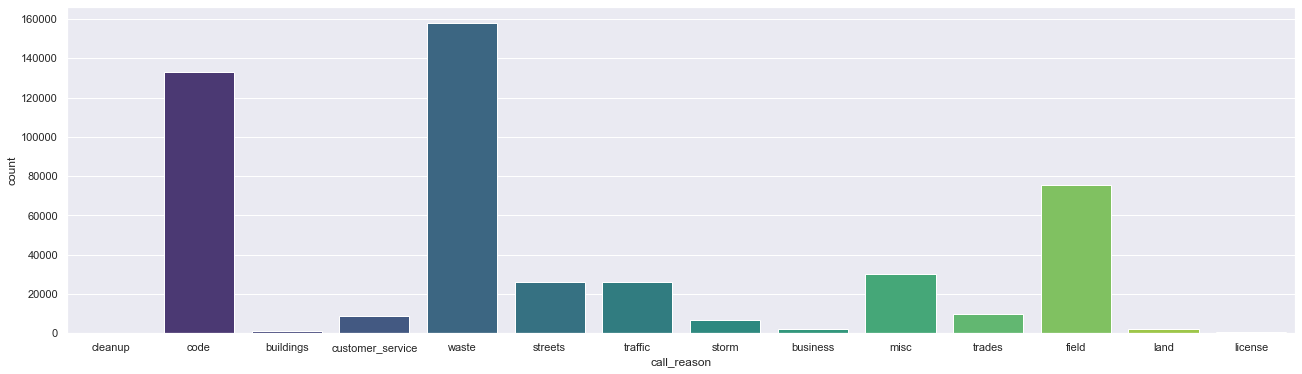

In [17]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
#signif_reasons = df.groupby("call_reason").filter(lambda g: (g.REASONNAME.size >= 2000))
sns.countplot(data = df, x = 'call_reason', palette = "viridis")

In [21]:
with open('Bexar_County_ZIP_Code_Areas.geojson', 'r') as jsonFile:
    data = json.load(jsonFile)
tmp = data

In [22]:
tmp

{'type': 'FeatureCollection',
 'name': 'Bexar_County_ZIP_Code_Areas',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 1,
    'PO_NAME': 'Atascosa',
    'STATE': 'TX',
    'SQMI': 39.7,
    'ZIP': '78002',
    'Lng': '-98.73143',
    'Lat': '29.282899',
    'ShapeSTArea': 1106572751.9570312,
    'ShapeSTLength': 145099.13412356516},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-98.79038499975296, 29.316248999913398],
      [-98.79037300012192, 29.314919999763607],
      [-98.79036299966286, 29.312507999989155],
      [-98.79035100033624, 29.308663999598238],
      [-98.79034299982862, 29.304025999930296],
      [-98.79034190009494, 29.30371759973336],
      [-98.79032300046342, 29.298635999893218],
      [-98.79030300010403, 29.293246000325663],
      [-98.79029399956882, 29.29199499993977],
      [-98.79029899978826, 29.289942000113232],
      [-98.79029799985902, 29.2897499

In [23]:
geozips = []
for i in range (len(tmp['features'])):
    if tmp['features'][i]['properties']['ZIP'] in list(df['zipcode'].unique()):
        geozips.append(tmp['features'][i])

In [25]:
new_json

74

In [34]:
df.groupby('zipcode').count()

case_id  open_date  due_date  closed_date  is_late  dept  \
zipcode                                                             
78002          4          4         4            3        4     4   
78006         22         22        22           20       22    22   
78015         26         26        26           26       26    26   
78023       1230       1230      1230         1151     1230  1230   
78052        106        106       106          106      106   106   
...          ...        ...       ...          ...      ...   ...   
78263         15         15        15           15       15    15   
78264        228        228       228          207      228   228   
78266        317        317       317          305      317   317   
78284          5          5         5            4        5     5   
78288         20         20        20           18       20    20   

         call_reason  case_type  case_status  source_id  address  \
zipcode                                                            
78002              4          4            4          4        4   
78006             22         22           22         22       22   
78015             26         26           26         26       26   
78023           1230       1230         1230       1230     1230   
78052            106        106          106        106      106   
...              ...        ...          ...        ...      ...   
78263             15         15           15         15       15   
78264            228        228          228        228      228   
78266            317        317          317        317      317   
78284              5          5            5          5        5   
78288             20         20           20         20       20   

         council_district  longitude  latitude  days_open  \
zipcode                                                     
78002                   4          4         4          3   
78006                  22         22        22         20   
78015                  26         26        26         26   
78023                1230       1230      1230       1151   
78052                 106        106       106        106   
...                   ...        ...       ...        ...   
78263                  15         15        15         15   
78264                 228        228       228        207   
78266                 317        317       317        305   
78284                   5          5         5          4   
78288                  20         20        20         18   

         resolution_days_due  days_before_or_after_due  level_of_delay  
zipcode                                                                 
78002                      4                         3               4  
78006                     22                        20              22  
78015                     26                        26              26  
78023                   1230                      1151            1230  
78052                    106                       106             106  
...                      ...                       ...             ...  
78263                     15                        15              15  
78264                    228                       207             228  
78266                    317                       305             317  
78284                      5                         4               5  
78288                     20                        18              20  

[78 rows x 18 columns]